# Dacon 시계열 날씨 데이터 오르내림 분류

시계열 날씨 데이터를 사용.

360개의 값을 입력으로 36개 뒤의 값의 오르 내림을 분류




# 데이터 준비

https://dacon.io/competitions/official/235584에 로그인 후 데이터 다운받고 압축을 풀어서 train.csv를 colab에 직접 업로드한다.

In [ ]:
!ls -al

total 1400
drwxr-xr-x 1 root root    4096 Aug 17 08:15 .
drwxr-xr-x 1 root root    4096 Aug 17 08:02 ..
drwxr-xr-x 4 root root    4096 Aug 13 13:34 .config
drwxr-xr-x 1 root root    4096 Aug 13 13:35 sample_data
-rw-r--r-- 1 root root 1414586 Aug 17 08:15 train.csv


In [ ]:
!head train.csv

id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,

In [ ]:
!wc train.csv

   4753    4753 1414586 train.csv


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [36]:
df = pd.read_csv("train.csv")

In [37]:
df.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [38]:
print(len(df.columns))

60


id


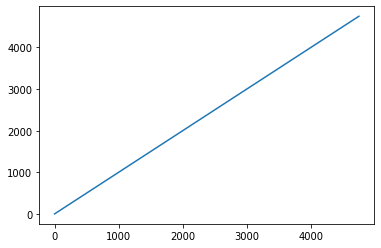

X00


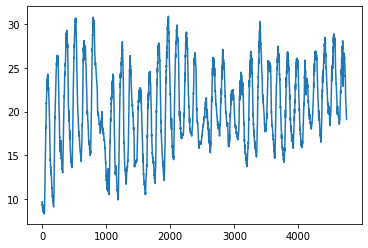

X01


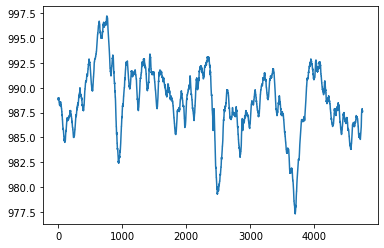

X02


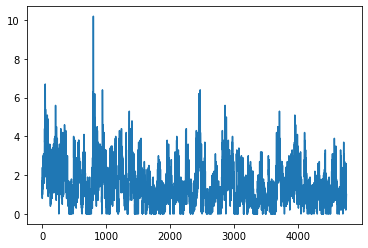

X03


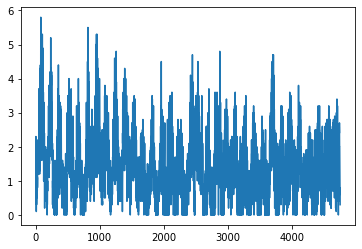

X04


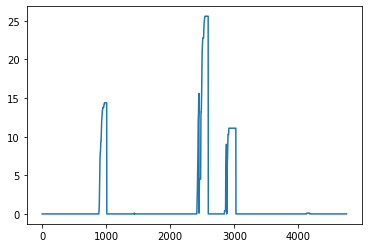

X05


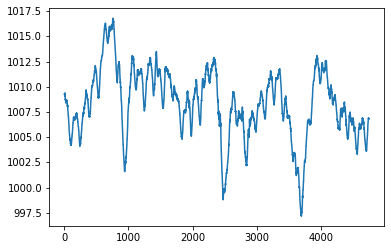

X06


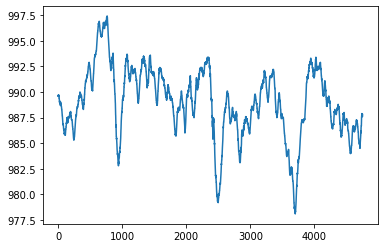

X07


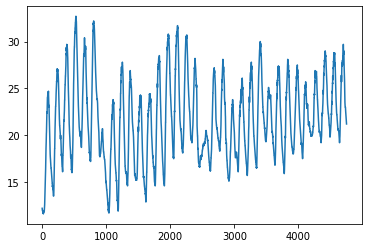

X08


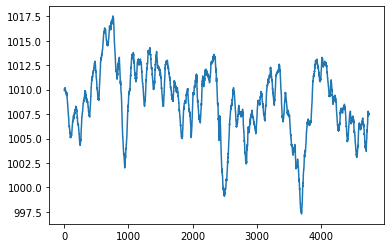

X09


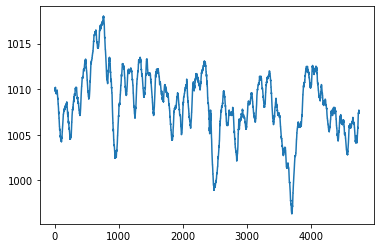

X10


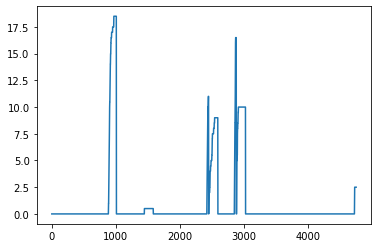

X11


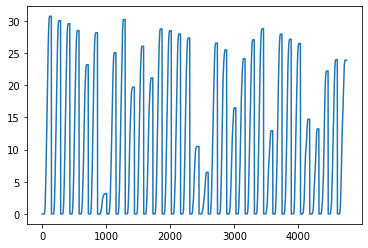

X12


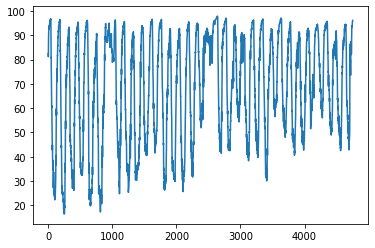

X13


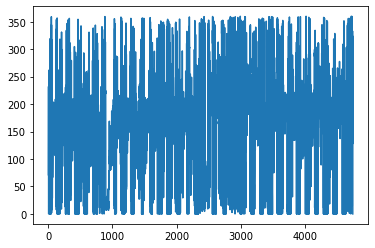

X14


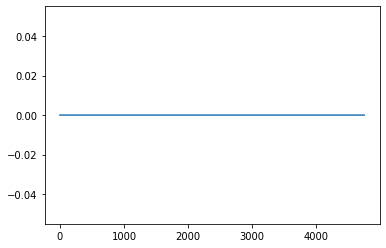

X15


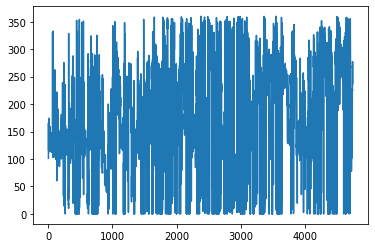

X16


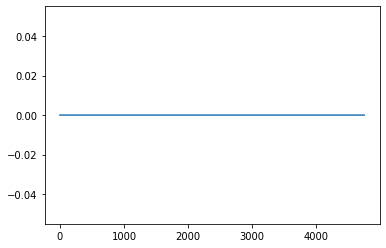

X17


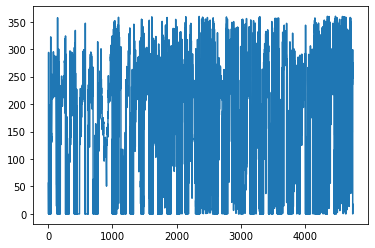

X18


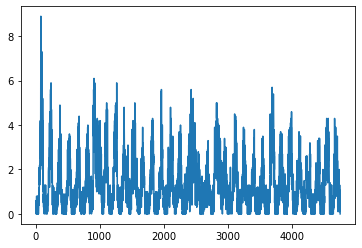

X19


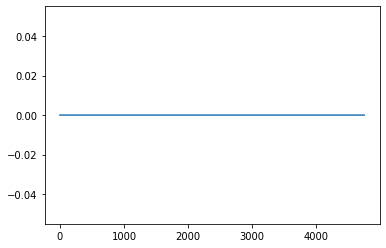

X20


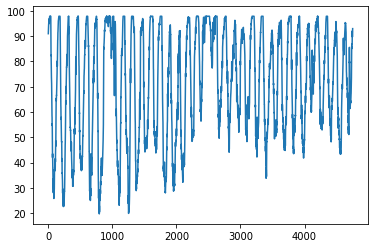

X21


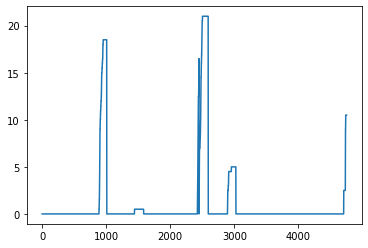

X22


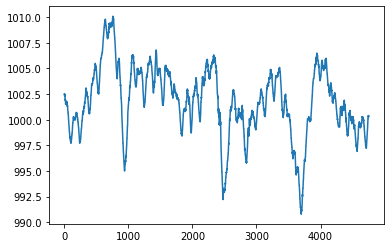

X23


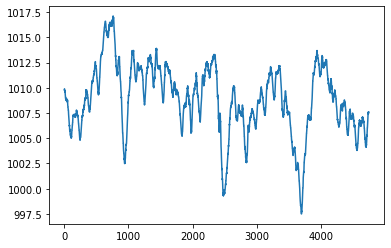

X24


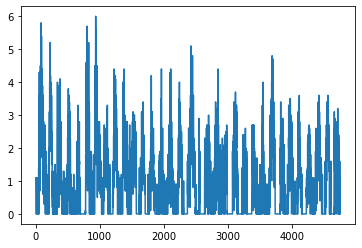

X25


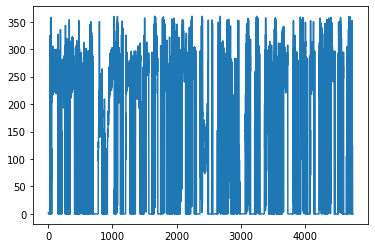

X26


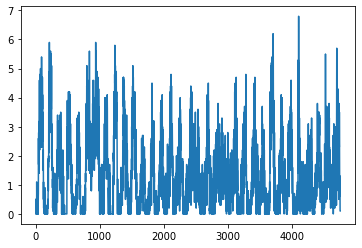

X27


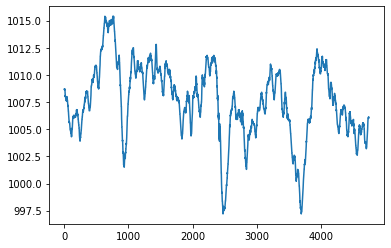

X28


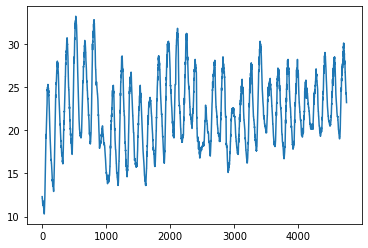

X29


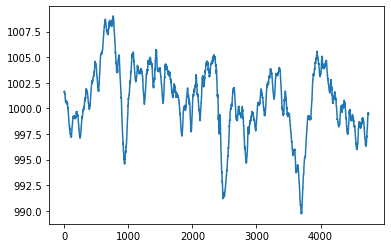

X30


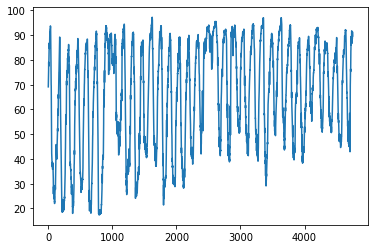

X31


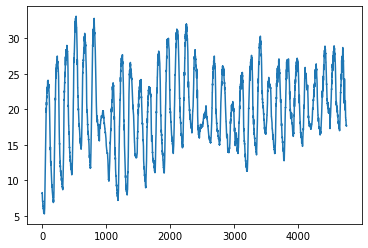

X32


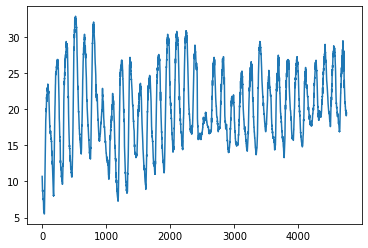

X33


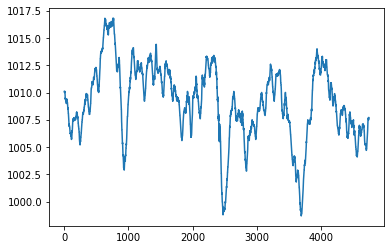

X34


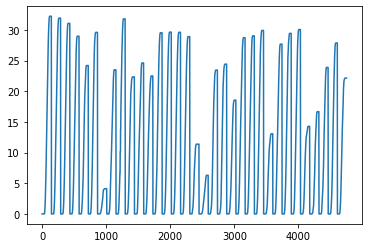

X35


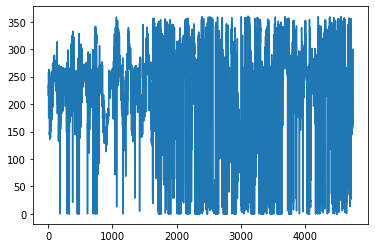

X36


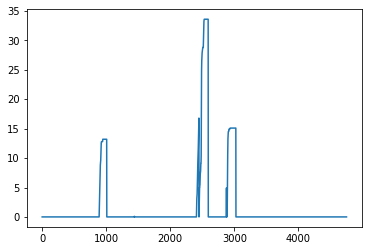

X37


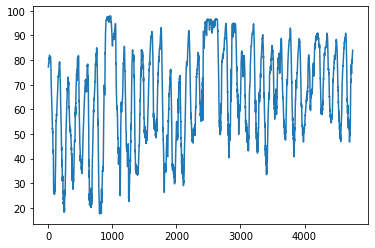

X38


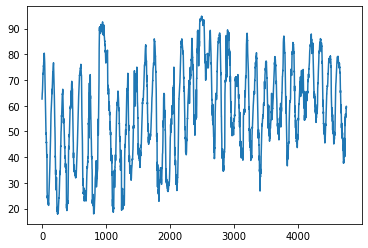

X39


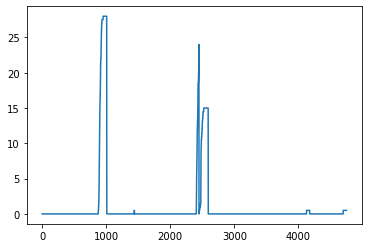

Y00


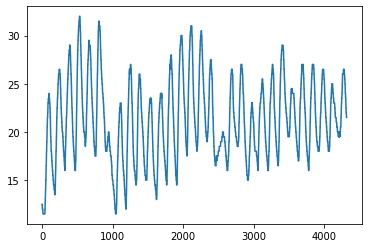

Y01


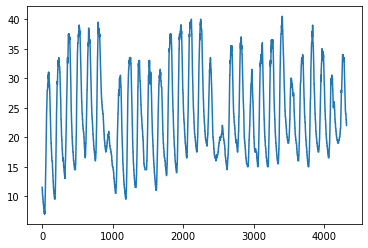

Y02


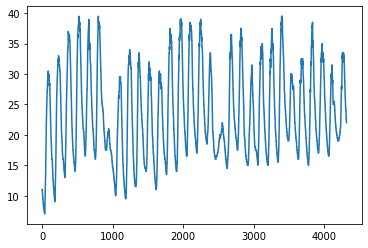

Y03


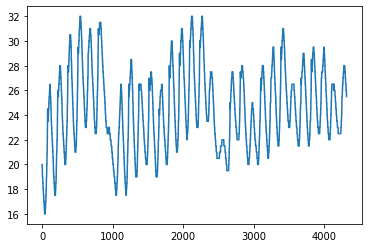

Y04


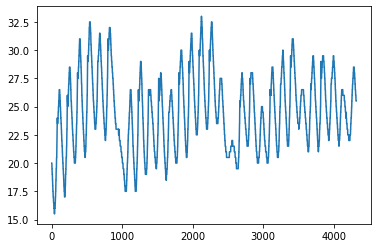

Y05


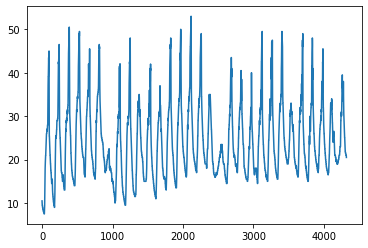

Y06


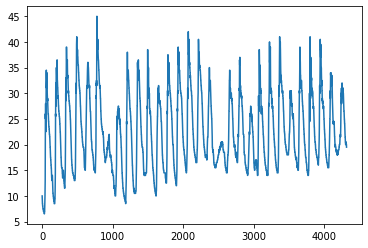

Y07


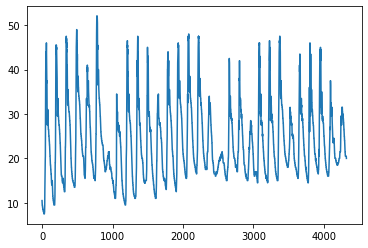

Y08


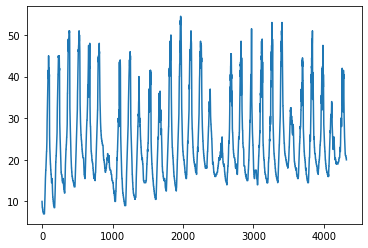

Y09


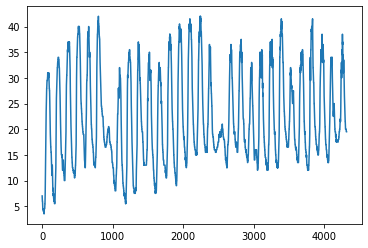

Y10


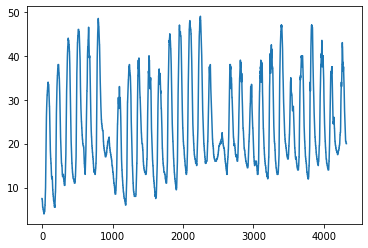

Y11


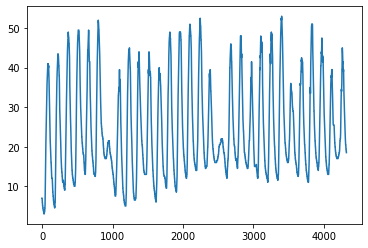

Y12


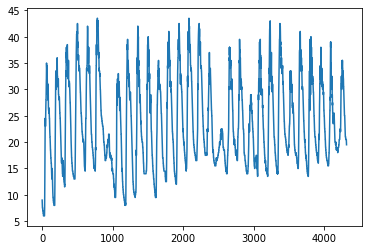

Y13


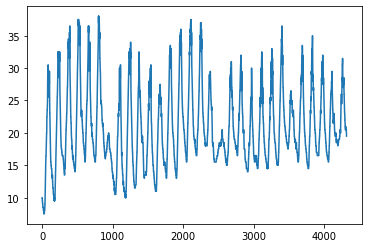

Y14


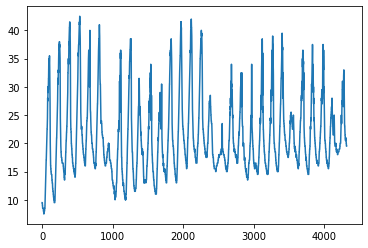

Y15


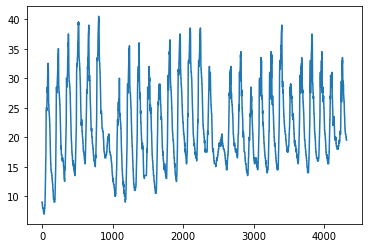

Y16


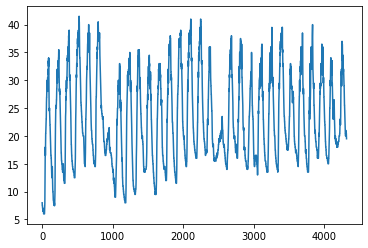

Y17


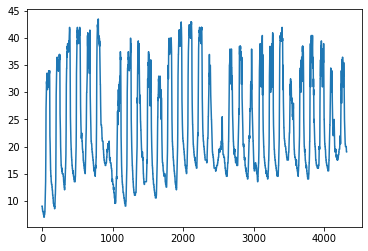

Y18


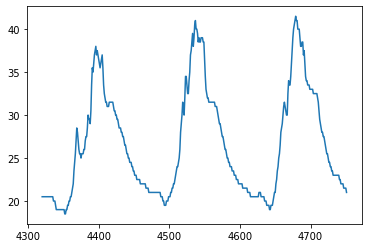

In [39]:
for column_name in df.columns:
  print(column_name)
  df[column_name].plot()
  plt.show()



## 대상 컬럼만 추리기

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4752 non-null   int64  
 1   X00     4752 non-null   float64
 2   X01     4752 non-null   float64
 3   X02     4752 non-null   float64
 4   X03     4752 non-null   float64
 5   X04     4752 non-null   float64
 6   X05     4752 non-null   float64
 7   X06     4752 non-null   float64
 8   X07     4752 non-null   float64
 9   X08     4752 non-null   float64
 10  X09     4752 non-null   float64
 11  X10     4752 non-null   float64
 12  X11     4752 non-null   float64
 13  X12     4752 non-null   float64
 14  X13     4752 non-null   float64
 15  X14     4752 non-null   float64
 16  X15     4752 non-null   float64
 17  X16     4752 non-null   float64
 18  X17     4752 non-null   float64
 19  X18     4752 non-null   float64
 20  X19     4752 non-null   float64
 21  X20     4752 non-null   float64
 22  

column index 41~59까지는 데이터 갯수가 전체 4752에서 모자란다.

column index 1은 timestamp에 해당하는 id이다. 전체 컬럼중에서 1~40까지만 사용한다.

In [41]:
features = df.iloc[:,1:41]
features.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0


In [42]:
print(len(features.columns))

40


## standardization

In [43]:
data_mean = features.mean(axis=0)
data_std = features.std(axis=0)
features = (features - data_mean) / data_std

In [44]:
print(features.shape)

(4752, 40)


## NaN 값이 있는 컬럼 제거

X14, X16, X19 컬럼에 NaN가 있다.

컬럼 값이 전부 같은 경우 standardization 하면 NaN이 될 수 있다. 컬럼을 제거하자.

In [45]:
print(features.isnull())
print(features.isnull().any())
print(features.isnull().any().any())

        X00    X01    X02    X03    X04  ...    X35    X36    X37    X38    X39
0     False  False  False  False  False  ...  False  False  False  False  False
1     False  False  False  False  False  ...  False  False  False  False  False
2     False  False  False  False  False  ...  False  False  False  False  False
3     False  False  False  False  False  ...  False  False  False  False  False
4     False  False  False  False  False  ...  False  False  False  False  False
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
4747  False  False  False  False  False  ...  False  False  False  False  False
4748  False  False  False  False  False  ...  False  False  False  False  False
4749  False  False  False  False  False  ...  False  False  False  False  False
4750  False  False  False  False  False  ...  False  False  False  False  False
4751  False  False  False  False  False  ...  False  False  False  False  False

[4752 rows x 40 columns]
X00    False
X

In [46]:
features = features.drop(columns=['X14', 'X16', 'X19'])

In [47]:
print(features.isnull().any().any())

False


## target 데이터 생성

In [79]:
WINDOW_SIZE = 360
OFFSET = 36

In [80]:
series = features.to_numpy()

In [81]:
target_series = series[:,0]

In [82]:
# target_series = np.array([ 0,  1,  2,  3,  2,  1,  0,  1,  2,  3])
# OFFSET = 2

targets 값을 구한다.

targets값은 각 자리의 값이 OFFSET 이전의 값 보다 커졌음을 의미한다.

In [83]:
shifted = np.roll(target_series, OFFSET)
diff = target_series - shifted
targets = (diff>0).astype(np.int)
# target_series  : [ 0  1  2  3  2  1  0  1  2  3]
#                       ------>
# shifted        : [ 2  3  0  1  2  3  2  1  0  1]
#
# diff           : [-2 -2  2  2  0 -2 -2  0  2  2]
#                             ^
#                             2 = 3 - 1
#                             이 자리의 값(3)은 OFFSET(2) 앞의 값(1) 보다 2 크다. 
#
# targets        : [ 0  0  1  1  0  0  0  0  1  1]
#
# targets는 오르 내림을 의미. 1: 커짐, 0: 안커짐

# roll에 의해 앞으로 온 값은 무시한다.
targets[:OFFSET] = 0

# print(target_series)
# print(shifted)
# print(diff)
# print(targets)

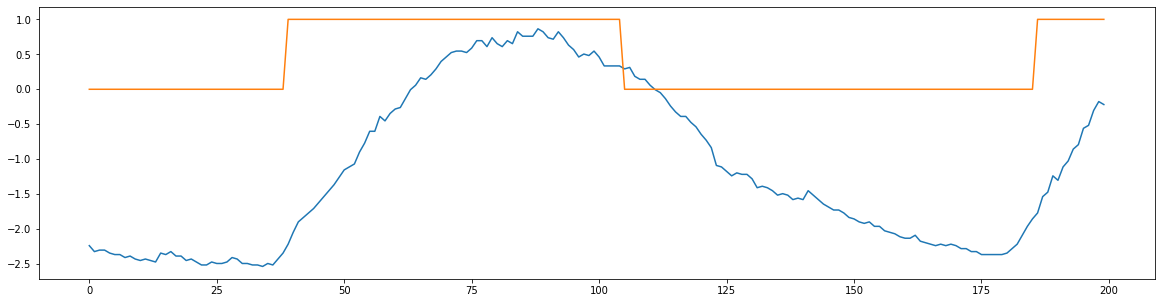

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(series[:200,0])
plt.plot(targets[:200])
plt.show()

In [85]:
# 실제 예측할 값은 OFFSET 뒤의 오르내림이다.
targets = np.roll(targets, -(OFFSET-1))

# 마지막에 있는 값들은 의미 없는 앞의 값들이 들어 있다. 버리자.
series = series[:-(OFFSET)]
targets = targets[:-(OFFSET)]

In [61]:
print(series.shape)
print(targets.shape)

(4752, 37)
(4752,)


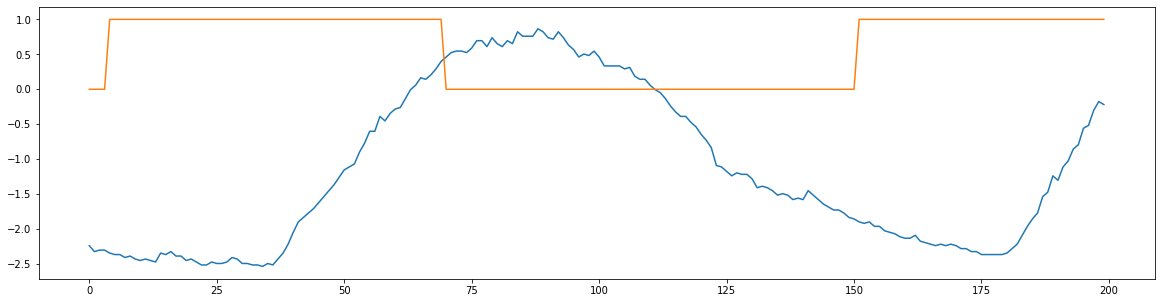

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(series[:200,0])
plt.plot(targets[:200])
plt.show()

## TimeseriesGenerator 생성

In [88]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

split_index = int(len(series)*0.8)

generator = TimeseriesGenerator(series, targets, length=WINDOW_SIZE, batch_size=256, 
                                shuffle=True, end_index=split_index)

test_generator = TimeseriesGenerator(series, targets, length=WINDOW_SIZE, batch_size=256, 
                                     shuffle=True, start_index=split_index)


# 모델 정의와 학습

In [89]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

inputs = Input((WINDOW_SIZE,series.shape[1]))
lstm_out = LSTM(32)(inputs)
# outputs = Dense(1)(lstm_out)
outputs = Dense(2, activation="softmax")(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizer=Adam(), loss="mse")
model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 360, 37)]         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8960      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit(generator, 
          validation_data=test_generator, 
          steps_per_epoch=len(generator),
          validation_steps=len(test_generator), 
          epochs=100, 
          verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 62ms/step - loss: 0.4394 - acc: 0.8262 - val_loss: 0.3686 - val_acc: 0.8281
Epoch 2/100
14/14 [==============================] - 0s 31ms/step - loss: 0.2879 - acc: 0.8901 - val_loss: 0.3106 - val_acc: 0.8789
Epoch 3/100
14/14 [==============================] - 0s 31ms/step - loss: 0.2153 - acc: 0.9213 - val_loss: 0.1959 - val_acc: 0.9206
Epoch 4/100
14/14 [==============================] - 0s 31ms/step - loss: 0.1712 - acc: 0.9375 - val_loss: 0.1823 - val_acc: 0.9310
Epoch 5/100
14/14 [==============================] - 0s 32ms/step - loss: 0.1345 - acc: 0.9484 - val_loss: 0.2018 - val_acc: 0.9362
Epoch 6/100
14/14 [==============================] - 0s 31ms/step - loss: 0.1194 - acc: 0.9570 - val_loss: 0.2002 - val_acc: 0.9245
Epoch 7/100
14/14 [==============================] - 0s 32ms/step - loss: 0.1189 - acc: 0.9517 - val_loss: 0.1895 - val_acc: 0.9271
Epoch 8/100
14/14 [==============================] - 0s 31ms/step - loss: 0.

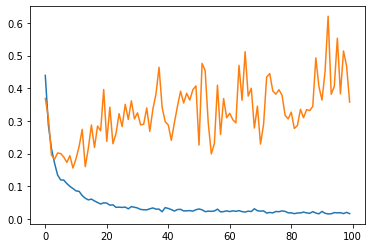

In [91]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.show()

# 결과 보기

In [94]:
x, y = test_generator[0]
y_ = model.predict(x)
y_ = np.argmax(y_, axis=1)
print(y[:20])
print(y_[:20])

[1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0]
[1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0]


[0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0]
[0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0]
expected : 0, actual : 0


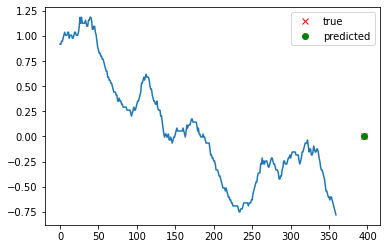

expected : 1, actual : 1


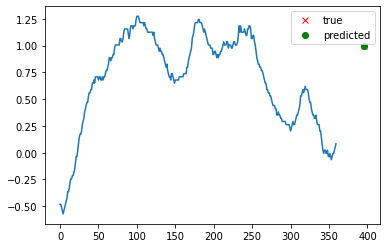

expected : 1, actual : 1


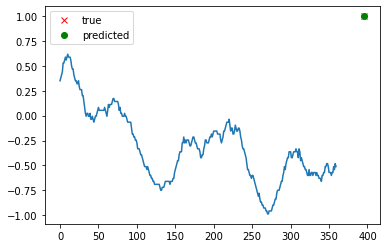

expected : 1, actual : 1


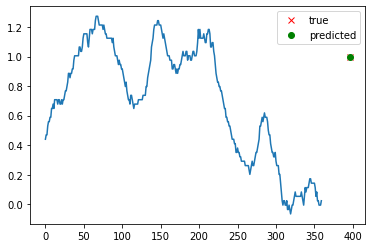

expected : 0, actual : 0


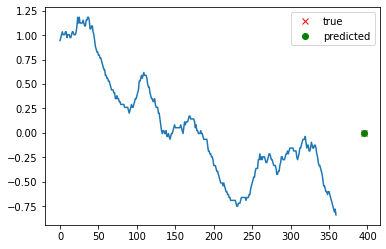

In [97]:
x, y = test_generator[0]
y_ = model.predict(x)
y_ = np.argmax(y_, axis=1)
print(y[:20])
print(y_[:20])

for i in range(5):
  print("expected : {}, actual : {}".format(y_[i], y[i]))
  plt.plot(x[i,:,1])
  plt.plot([WINDOW_SIZE+OFFSET], y[i], 'rx', label="true")
  plt.plot([WINDOW_SIZE+OFFSET], y_[i], 'go', label="predicted")
  plt.legend()
  plt.show()

